In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [0]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [0]:
import io

train_data = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test_data = pd.read_csv(io.BytesIO(uploaded['test.csv']))

In [0]:
columns_to_drop = ["PassengerId","Name","Ticket","Cabin","Embarked"]

In [0]:
data_clean = train_data.drop(columns_to_drop,axis=1)

In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data_clean["Sex"] = le.fit_transform(data_clean["Sex"])

In [0]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [0]:
data_clean = data_clean.fillna(data_clean["Age"].mean())

In [0]:
input_cols = ["Pclass","Sex","Age","SibSp","Parch","Fare"]
output_cols = ["Survived"]

In [0]:
sk_tree = DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [0]:
sk_tree.fit(data_clean[input_cols],data_clean[output_cols])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
test_data = test_data.drop(columns_to_drop,axis=1)

In [0]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass    418 non-null int64
Sex       418 non-null object
Age       332 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      417 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 19.7+ KB


In [0]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

In [0]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass    418 non-null int64
Sex       418 non-null object
Age       418 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      418 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 19.7+ KB


In [0]:
test_data["Sex"] = le.fit_transform(test_data["Sex"])

In [0]:
y_pred = sk_tree.predict(test_data)

In [0]:
import pydotplus

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

In [0]:
dot_data = StringIO()
export_graphviz(sk_tree,out_file=dot_data,filled=True,rounded=True)

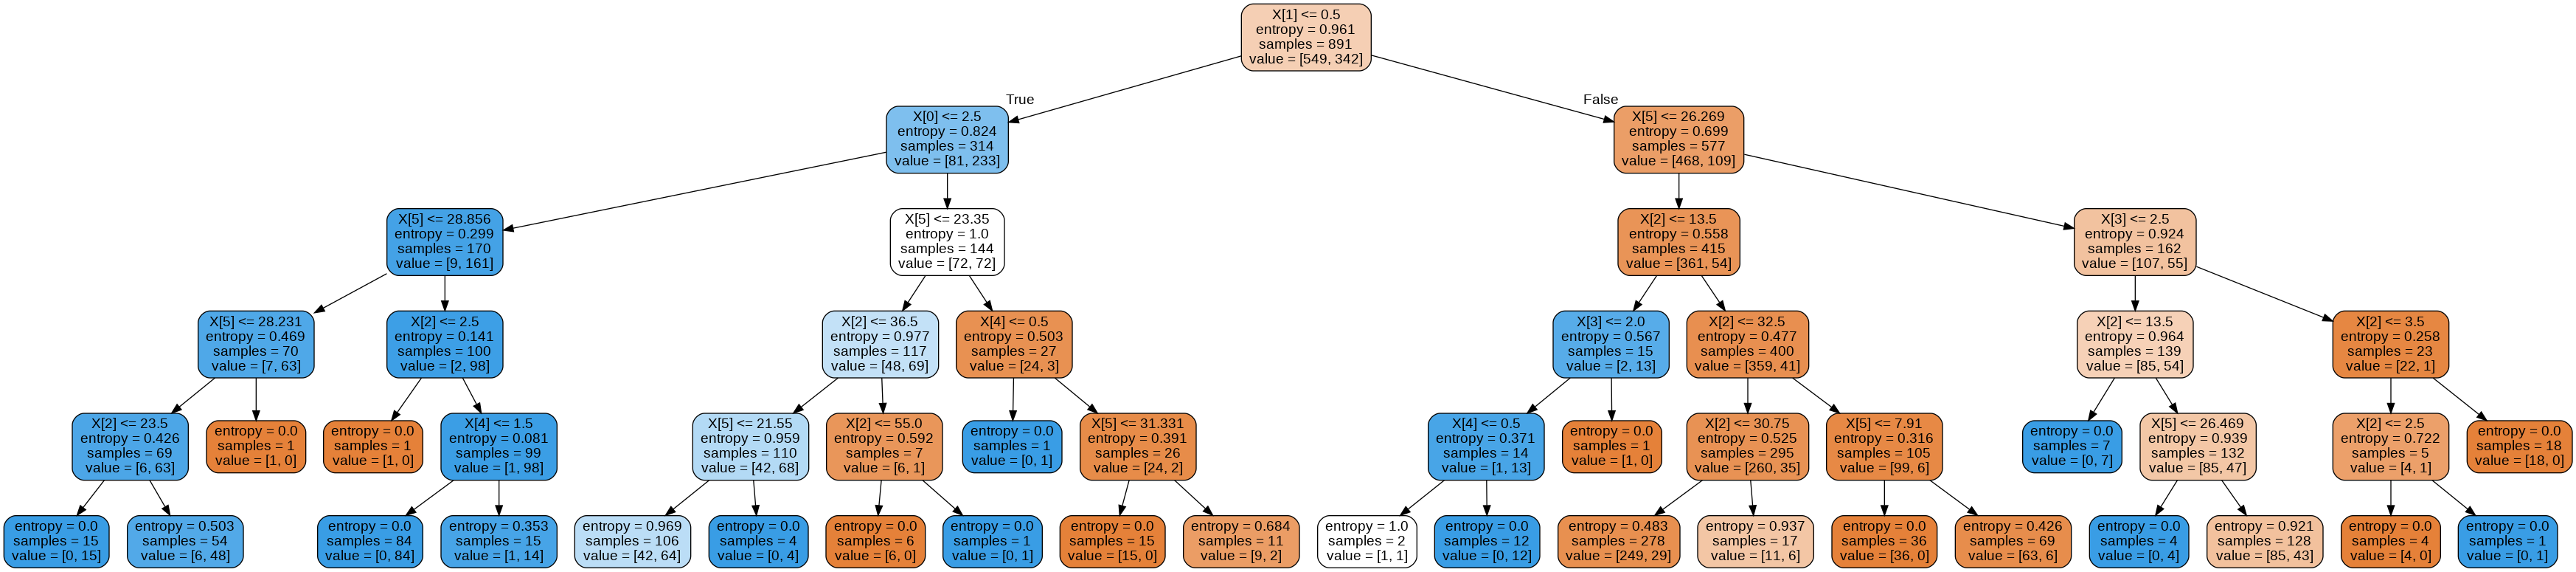

In [0]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())